In [1]:
from textblob import TextBlob
import re
from nltk import word_tokenize 
from nltk import pos_tag
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from PIL import Image
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 1. Prichystanie objektu dataframe, zoznamu skrátených výrazov a zoznamu kategórií sentimentu 

In [2]:
df_azure_speech = pd.DataFrame(columns=['Sentence', 'Pre-processed sentence', 'textblob-subjectivity', 'vader-pos', 'vader-neg', 'vader-neu', 'vader-compound', 'vader-polarity', 'sentiment-category'])
pos_words_str_vader = ""
neg_words_str_vader = ""

In [3]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he shall have he will have",
"he's": "he has he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has how is",
"i'd": "I had I would",
"i'd've": "I would have",
"i'll": "I shall I will",
"i'll've": "I shall have I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had it would",
"it'd've": "it would have",
"it'll": "it shall it will",
"it'll've": "it shall have it will have",
"it's": "it has it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had she would",
"she'd've": "she would have",
"she'll": "she shall she will",
"she'll've": "she shall have she will have",
"she's": "she has she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as so is",
"that'd": "that would that had",
"that'd've": "that would have",
"that's": "that has that is",
"there'd": "there had there would",
"there'd've": "there would have",
"there's": "there has there is",
"they'd": "they had they would",
"they'd've": "they would have",
"they'll": "they shall they will",
"they'll've": "they shall have they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has what is",
"what've": "what have",
"when's": "when has when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has where is",
"where've": "where have",
"who'll": "who shall who will",
"who'll've": "who shall have who will have",
"who's": "who has who is",
"who've": "who have",
"why's": "why has why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had you would",
"you'd've": "you would have",
"you'll": "you shall you will",
"you'll've": "you shall have you will have",
"you're": "you are",
"you've": "you have"
}

In [4]:
sentiment_category = {
    'Satisfaction' : ['like', 'love', 'enjoy', 'appreciate'], 
    'Dissatisfaction' : ['hate', 'dislike'],
    'Confusion' : ['confuse', 'stuck', 'puzzle'],
    'Expectation' : ['expect', 'hope', 'anticipate', 'assume', 'suppose'], 
    'Suggestion' : ['prefer', 'preferable', 'favor', 'suggest'] 
}

# 2. Otvorenie súboru 

In [5]:
# Zadať názov súboru, do ktorého chceme ukladať výsledky 
filename = "results/results-eval-full/19-sk-en-results.csv"
# Zadať názov súboru, ktorý chceme otvoriť 
with open("speech/4.txt", 'r') as transcript_sentences:
    text = transcript_sentences.read()

# 3. Predspracovanie textu 

In [6]:
# Rozdelenie textu po vetách 
sentences = nltk.tokenize.sent_tokenize(text)

for sentence in sentences:
    print(sentence)

So.
There is something good.
I also hope that the rash greed is sharing.
Uh.
No windows dash.
Now shut up.
And.
Looks fairly similar to the Dutch website, right, etc?
And.
This takes.
Just same as it is over here.
Fairly similar.
Yep.
And test you have your increase number compared to.
I don't know when that could be.
It different how many people are hopeful their sent flexion ated?
This one I should make would make my own.
Bubble because I don't think these are just.
People below the straight will not be needed.
Each other.
How many vaccinated people pretty clear and maybe put this number would make sense also right here.
Uhm?
But yeah, it makes sense.
It looks good.
Useful that this is just right at film top, because I suspect a lot of people need it.
The QikLink makes sense.
Uhm?
I don't know exactly what this means.
Some things don't translate directly very well like this.
And well, this map isn't working, so that's a bit weird.
And.
Front page looks very clear, make sense and.
Loo

In [7]:
# Čistenie textu - nahradzovanie skrátených výrazov, substitúcia znakov
def clean_sentences(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    text = re.sub(r'[^\w\s]', '', text)
    return text

lines_clean = []
for sentence in sentences:
    lines_clean.append(clean_sentences(sentence))
    
print(lines_clean)

['So', 'There is something good', 'I also hope that the rash greed is sharing', 'Uh', 'No windows dash', 'Now shut up', 'And', 'Looks fairly similar to the Dutch website right etc', 'And', 'This takes', 'Just same as it is over here', 'Fairly similar', 'Yep', 'And test you have your increase number compared to', 'I do not know when that could be', 'It different how many people are hopeful their sent flexion ated', 'This one I should make would make my own', 'Bubble because I do not think these are just', 'People below the straight will not be needed', 'Each other', 'How many vaccinated people pretty clear and maybe put this number would make sense also right here', 'Uhm', 'But yeah it makes sense', 'It looks good', 'Useful that this is just right at film top because I suspect a lot of people need it', 'The QikLink makes sense', 'Uhm', 'I do not know exactly what this means', 'Some things do not translate directly very well like this', 'And well this map is not working so that has that 

In [8]:
# POS tagovanie a tokenizácia textu 
pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(str(text)))
    newlist = []
    for word, tag in tags:
        newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

lines_token_pos = []
for sentence in lines_clean:
    lines_token_pos.append(token_stop_pos(sentence))

print(lines_token_pos)

[[('So', 'r')], [('There', None), ('is', 'v'), ('something', 'n'), ('good', 'a')], [('I', None), ('also', 'r'), ('hope', 'v'), ('that', None), ('the', None), ('rash', 'n'), ('greed', 'n'), ('is', 'v'), ('sharing', 'v')], [('Uh', 'n')], [('No', None), ('windows', 'n'), ('dash', 'v')], [('Now', 'r'), ('shut', 'v'), ('up', 'r')], [('And', None)], [('Looks', 'n'), ('fairly', 'r'), ('similar', 'a'), ('to', None), ('the', None), ('Dutch', 'n'), ('website', 'n'), ('right', 'n'), ('etc', 'n')], [('And', None)], [('This', None), ('takes', 'v')], [('Just', 'r'), ('same', 'a'), ('as', None), ('it', None), ('is', 'v'), ('over', None), ('here', 'r')], [('Fairly', 'r'), ('similar', 'a')], [('Yep', 'n')], [('And', None), ('test', 'n'), ('you', None), ('have', 'v'), ('your', None), ('increase', 'n'), ('number', 'n'), ('compared', 'v'), ('to', None)], [('I', None), ('do', 'v'), ('not', 'r'), ('know', 'v'), ('when', None), ('that', None), ('could', None), ('be', 'v')], [('It', None), ('different', 'a'),

In [9]:
# Lematizácia 
wordnet_lemmatizer = WordNetLemmatizer()     
def lemmatize_(text):
    lemmatized_sentence = []
    for word, tag in text:
        if tag is None:
            if word.lower() == "like":
                lemmatized_sentence.append(word + '-(NON-STANDARD)')
            else:
                lemmatized_sentence.append(word)
        else:       
            lemmatized_sentence.append(wordnet_lemmatizer.lemmatize(word, tag))
    return lemmatized_sentence

lines_lemma = []
for phrase in lines_token_pos:
    lines_lemma.append(lemmatize_(phrase))

print(lines_lemma)

[['So'], ['There', 'be', 'something', 'good'], ['I', 'also', 'hope', 'that', 'the', 'rash', 'greed', 'be', 'share'], ['Uh'], ['No', 'window', 'dash'], ['Now', 'shut', 'up'], ['And'], ['Looks', 'fairly', 'similar', 'to', 'the', 'Dutch', 'website', 'right', 'etc'], ['And'], ['This', 'take'], ['Just', 'same', 'as', 'it', 'be', 'over', 'here'], ['Fairly', 'similar'], ['Yep'], ['And', 'test', 'you', 'have', 'your', 'increase', 'number', 'compare', 'to'], ['I', 'do', 'not', 'know', 'when', 'that', 'could', 'be'], ['It', 'different', 'how', 'many', 'people', 'be', 'hopeful', 'their', 'sent', 'flexion', 'ated'], ['This', 'one', 'I', 'should', 'make', 'would', 'make', 'my', 'own'], ['Bubble', 'because', 'I', 'do', 'not', 'think', 'these', 'be', 'just'], ['People', 'below', 'the', 'straight', 'will', 'not', 'be', 'need'], ['Each', 'other'], ['How', 'many', 'vaccinated', 'people', 'pretty', 'clear', 'and', 'maybe', 'put', 'this', 'number', 'would', 'make', 'sense', 'also', 'right', 'here'], ['Uhm

In [10]:
# Vlastný zoznam stop-slov
stopwords_list = stopwords.words('english')
unwanted = {'no', 'not', 'nor'}
custom_stopwords = [e for e in stopwords_list if e not in unwanted]

In [11]:
# Odstránenie stop-slov
def remove_stopwords(text):
    clean_text = []
    for word in text:
        if word.lower() not in set(custom_stopwords):
            clean_text.append(word.lower())
    return clean_text

preprocessed_text = []
for phrase in lines_lemma:
    preprocessed_text.append(remove_stopwords(phrase))

print(preprocessed_text)

[[], ['something', 'good'], ['also', 'hope', 'rash', 'greed', 'share'], ['uh'], ['no', 'window', 'dash'], ['shut'], [], ['looks', 'fairly', 'similar', 'dutch', 'website', 'right', 'etc'], [], ['take'], [], ['fairly', 'similar'], ['yep'], ['test', 'increase', 'number', 'compare'], ['not', 'know', 'could'], ['different', 'many', 'people', 'hopeful', 'sent', 'flexion', 'ated'], ['one', 'make', 'would', 'make'], ['bubble', 'not', 'think'], ['people', 'straight', 'not', 'need'], [], ['many', 'vaccinated', 'people', 'pretty', 'clear', 'maybe', 'put', 'number', 'would', 'make', 'sense', 'also', 'right'], ['uhm'], ['yeah', 'make', 'sense'], ['look', 'good'], ['useful', 'right', 'film', 'top', 'suspect', 'lot', 'people', 'need'], ['qiklink', 'make', 'sense'], ['uhm'], ['not', 'know', 'exactly', 'mean'], ['thing', 'not', 'translate', 'directly', 'well', 'like-(non-standard)'], ['well', 'map', 'not', 'work', 'bit', 'weird'], [], ['front', 'page', 'look', 'clear', 'make', 'sense'], ['looks', 'good

In [12]:
# Modifikácia VADER lexikónu
analyzer = SentimentIntensityAnalyzer()
new_words = {
    'see': 2.0,
    'find': 2.0,
    'spot': 2.0,
    'grasp': 2.0,
    'perceive': 2.0,
    'identify': 2.0,
    'notice': 2.0,
    'distinguish': 2.0,
    'sight': 2.0,
    'glimpse': 2.0,
    'recognize': 2.0,
    'follow': 2.0,
    'realize': 2.0,
    'discover': 2.0,
    'little': -2.0,
    'small': -2.0,
    'tiny': -2.0,
    'large': 2.0,
    'know': 2.0, 
    'understand': 2.0,
    'kind': 1.5,
    'pretty': 1.5,
    'inconsistent': -2.0
}

analyzer.lexicon.update(new_words)

In [13]:
# Funkcia na hľadanie slov pre kategórie sentimentu 
def search(values, searchFor):
    cat_list = []
    for word in searchFor:
        for k in values:
            for v in values[k]:
                if word == v:
                    cat_list.append(k)
    if cat_list:
        return cat_list
    return None

In [14]:
#df_azure_speech = pd.DataFrame(columns=['Sentence', 'Pre-processed sentence', 'textblob-subjectivity', 'vader-pos', 'vader-neg', 'vader-neu', 'vader-compound', 'vader-polarity', 'sentiment-category'])
#pos_words_str_vader = ""
#neg_words_str_vader = ""

# 4. Analýza sentimentu

In [15]:
for sentence, line in zip(sentences, preprocessed_text):
    line_string = " ".join(line)
    txtblob_object = TextBlob(line_string)
    subjectivity = txtblob_object.sentiment.subjectivity
    sentiment_vader = analyzer.polarity_scores(line_string)

    sent_cat = search(sentiment_category, line)
    
    if sentiment_vader['compound'] < 0:
        polarity = 'Negative'
        neg_words_str_vader += line_string
        
    elif sentiment_vader['compound'] > 0:
        polarity = 'Positive'
        pos_words_str_vader += line_string
    else:
        polarity = 'Neutral'
    df_azure_speech = df_azure_speech.append({'Sentence': sentence,'Pre-processed sentence': line_string, 'textblob-subjectivity': subjectivity, 'vader-pos': sentiment_vader['pos'], 'vader-neg': sentiment_vader['neg'], 'vader-neu':sentiment_vader['neu'], 'vader-compound':sentiment_vader['compound'], 'vader-polarity': polarity, 'sentiment-category': sent_cat}, ignore_index=True)
  

In [16]:
# Uloženie finálneho výsledku do csv súboru
df_azure_speech.to_csv(filename)

# 5. Analýza reči jedného participanta

#### Mrak slov pre všetky slová z negatívnych viet

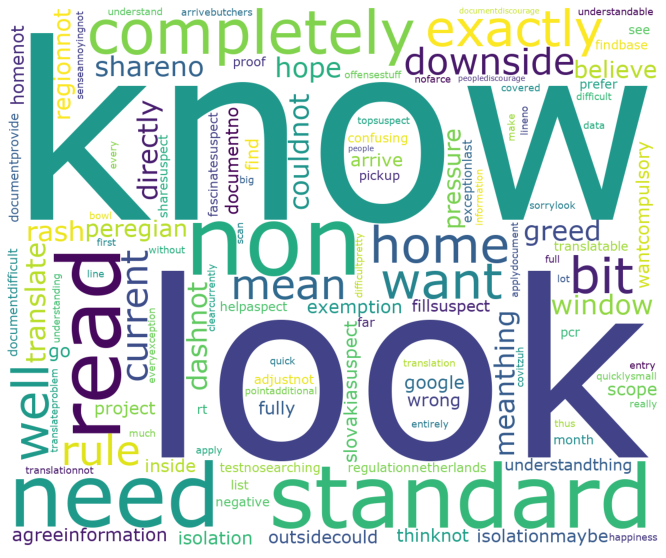

In [21]:
wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
                            stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1200,
                            height = 1000,
                            colormap='autumn',
                            collocations=False
                            ).generate(neg_words_str_vader)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Mrak slov pre všetky slová z pozitívnych viet

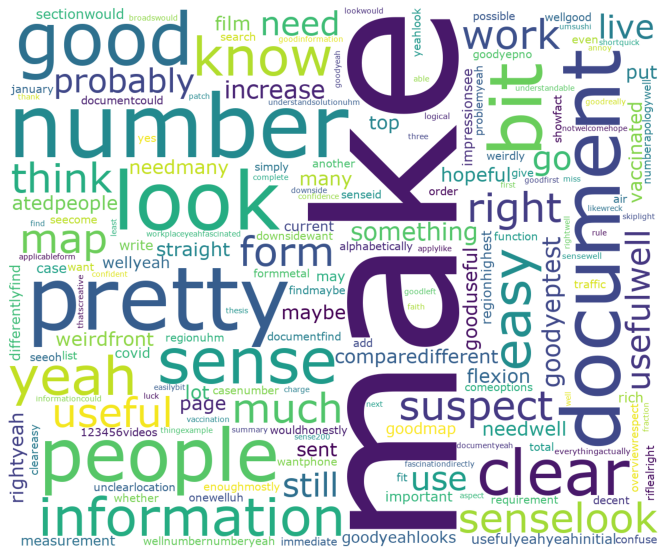

In [22]:
wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
                            stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1200,
                            height = 1000,
                            colormap='autumn',
                            collocations=False
                            ).generate(pos_words_str_vader)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Výsledný dataframe objekt

In [19]:
df_azure_speech

,Sentence,Pre-processed sentence,textblob-subjectivity,vader-pos,vader-neg,vader-neu,vader-compound,vader-polarity,sentiment-category
0,So.,,0.0,0.000,0.000,0.000,0.0000,Neutral,None
1,There is something good.,something good,0.6,0.744,0.000,0.256,0.4404,Positive,None
2,I also hope that the rash greed is sharing.,also hope rash greed share,0.0,0.443,0.470,0.087,-0.0772,Negative,[Expectation]
3,Uh.,uh,0.0,0.000,0.000,1.000,0.0000,Neutral,None
4,No windows dash.,no window dash,0.0,0.000,0.524,0.476,-0.2960,Negative,None
...,...,...,...,...,...,...,...,...,...
275,So I think I will give three again.,think give three,0.0,0.000,0.000,1.000,0.0000,Neutral,None
276,You're welcome for that.,welcome,0.9,1.000,0.000,0.000,0.4588,Positive,None
277,I participated.,participate,0.0,0.000,0.000,1.000,0.0000,Neutral,None
278,I hope your thesis will go well and my informa...,hope thesis go well information useful,0.0,0.725,0.000,0.275,0.7845,Positive,[Expectation]


#### Histogram jednotlivých hodnôt

In [20]:
# df_azure_speech.hist()
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_azure_speech.hist(ax = ax)

SyntaxError: invalid syntax (Temp/ipykernel_20120/3880127993.py, line 4)

#### Krabicový graf je hodnoty polarity sentimentu

In [ ]:
sns.boxplot(data=df_azure_speech, x="vader-polarity", y="vader-compound")

#### Koláčový graf pre porovnanie polarity sentimentu

In [ ]:
df_azure_speech['vader-polarity'].value_counts().plot(kind='pie')

#### 20 Najnegatívnejších viet

In [ ]:
df_azure_speech.sort_values('vader-compound').head(20)

#### V20 najpozitívnejších viet

In [ ]:
df_azure_speech.sort_values('vader-compound', ascending=False).head(20)